In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/internship_datasets/Bird Strikes data.csv")


df['FlightDate'] = pd.to_datetime(df['FlightDate'])

<ipython-input-1-36ffd94bafa0>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


In [ ]:
print(df.head())

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                      NaN 2001-07-25   
2                             261        

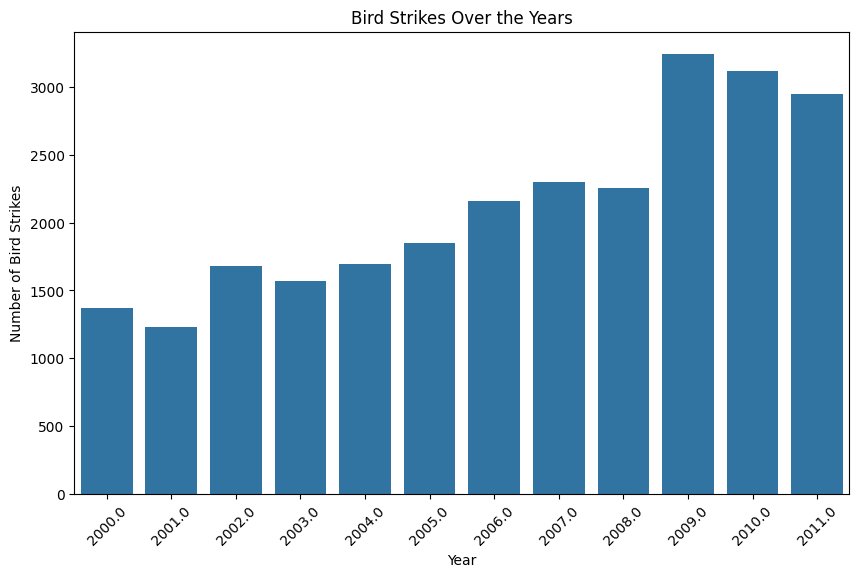

In [ ]:
# number of bird strikes over the years
plt.figure(figsize=(10, 6))
sns.countplot(x=df['FlightDate'].dt.year)
plt.title('Bird Strikes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

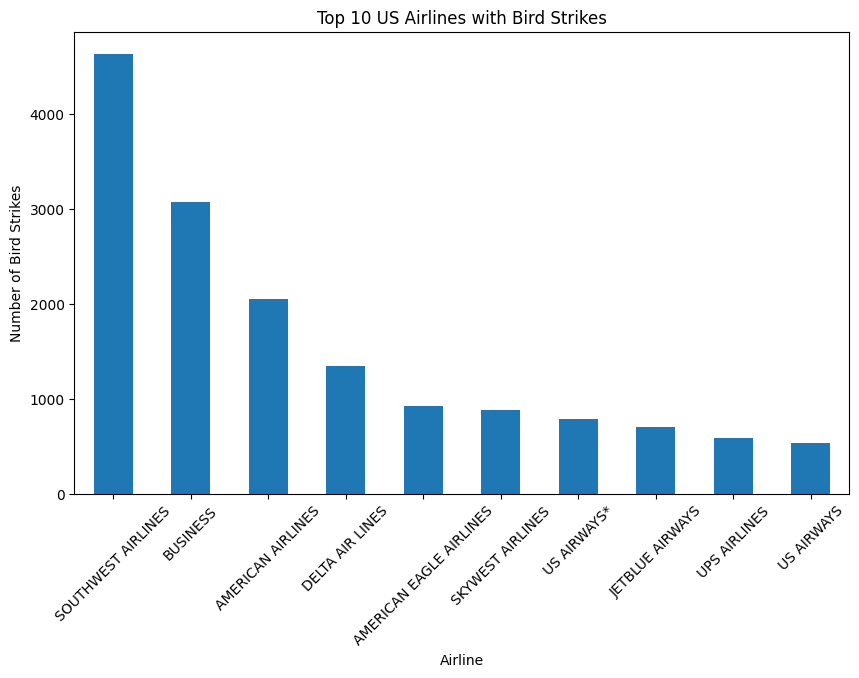

In [ ]:
# top 10 US airlines in terms of encountering bird strikes
top_airlines = df['Aircraft: Airline/Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar')
plt.title('Top 10 US Airlines with Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

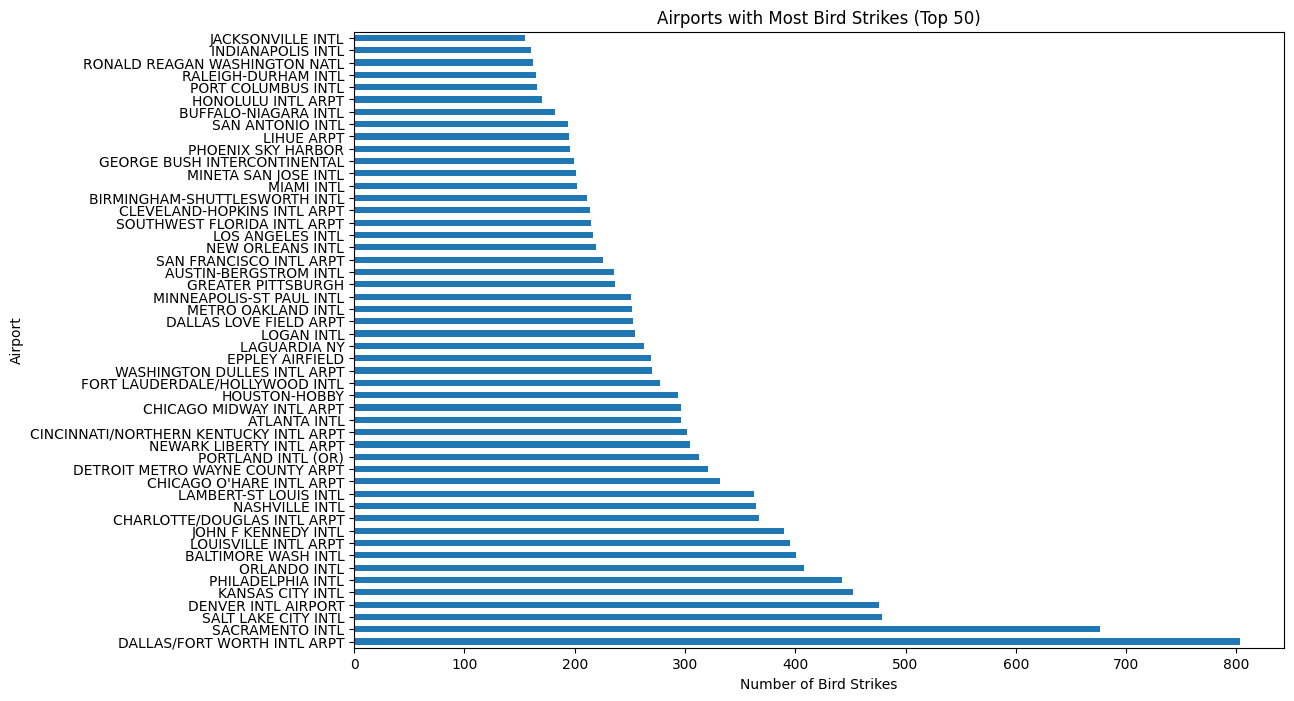

In [ ]:
# airports with the most incidents of bird strikes (Top 50)
top_airports = df['Airport: Name'].value_counts().head(50)
plt.figure(figsize=(12, 8))
top_airports.plot(kind='barh')
plt.title('Airports with Most Bird Strikes (Top 50)')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()

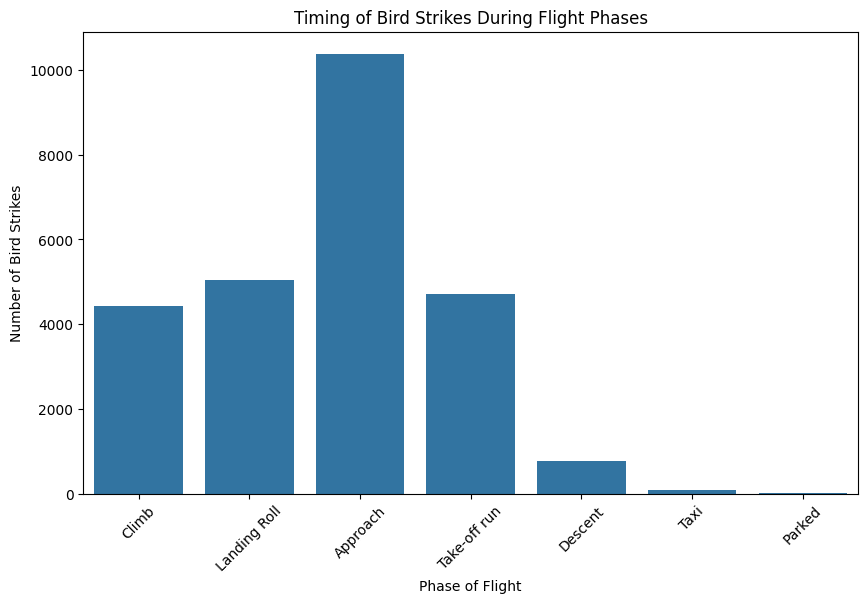

In [ ]:
#timing of bird strikes during different phases of flight
plt.figure(figsize=(10, 6))
sns.countplot(x=df['When: Phase of flight'])
plt.title('Timing of Bird Strikes During Flight Phases')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

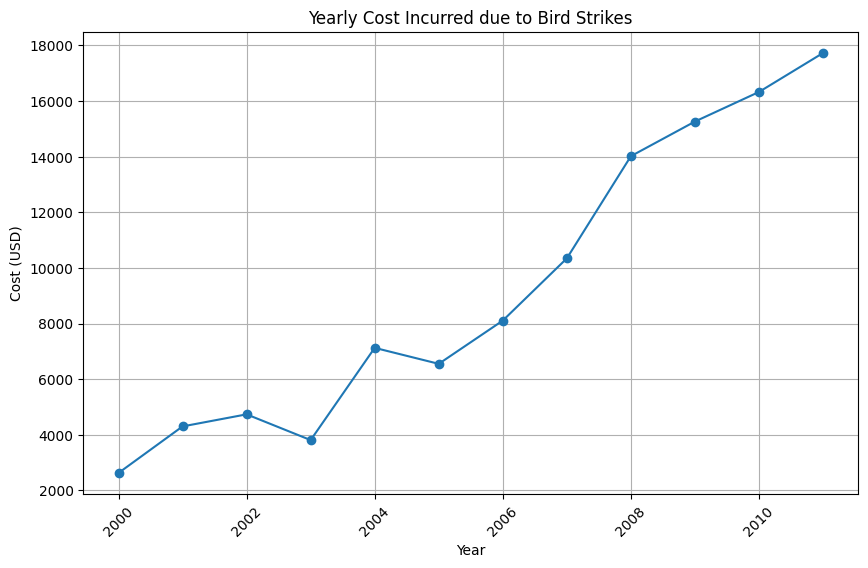

In [ ]:
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')
df.dropna(subset=['Cost: Total $'], inplace=True)

# plot of the yearly cost incurred due to bird strikes
plt.figure(figsize=(10, 6))
yearly_cost = df.groupby(df['FlightDate'].dt.year)['Cost: Total $'].sum()
yearly_cost.plot(marker='o')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Cost (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

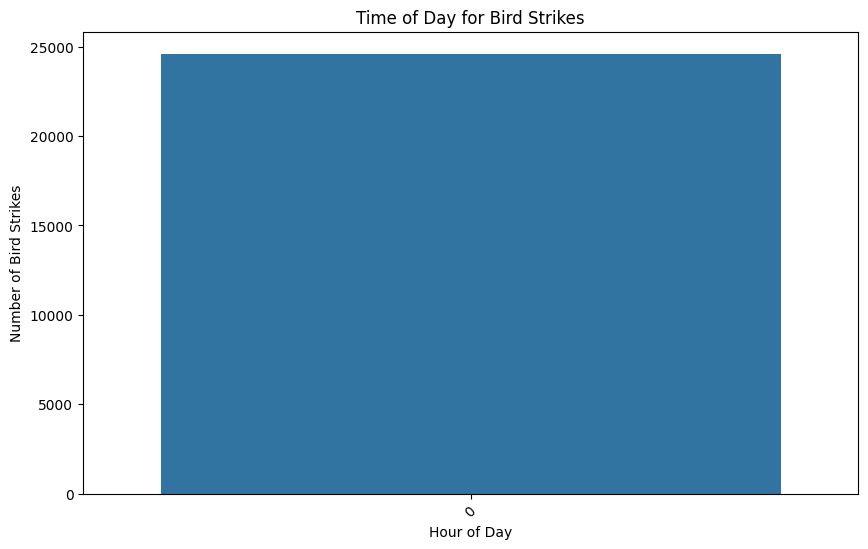

In [ ]:
# Convert 'FlightDate' column to datetime, coercing errors to NaN
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Drop rows with NaN values in 'FlightDate' column
df.dropna(subset=['FlightDate'], inplace=True)

# Now, plot the time of day for bird strikes
plt.figure(figsize=(10, 6))
sns.countplot(x=df['FlightDate'].dt.hour)
plt.title('Time of Day for Bird Strikes')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

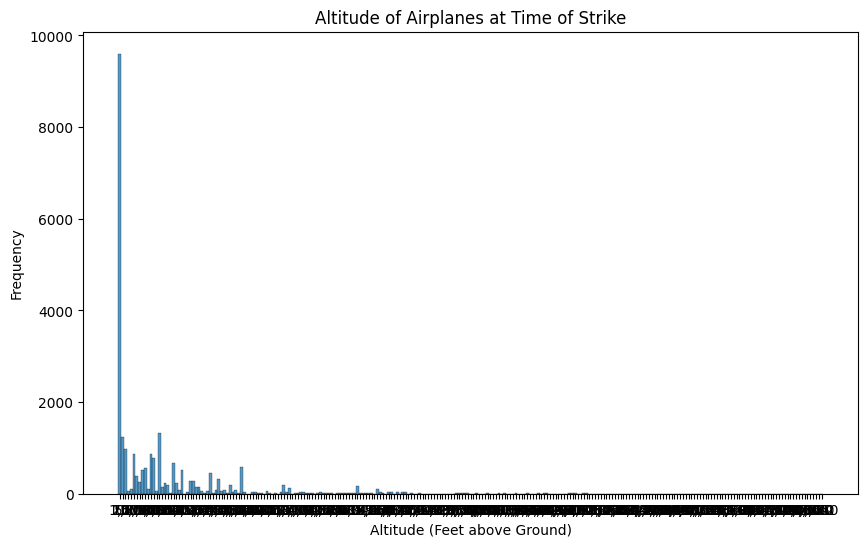

In [ ]:
# Altitude of airplanes at the time of strike
plt.figure(figsize=(10, 6))
sns.histplot(df['Feet above ground'], bins=20)
plt.title('Altitude of Airplanes at Time of Strike')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Frequency')
plt.show()

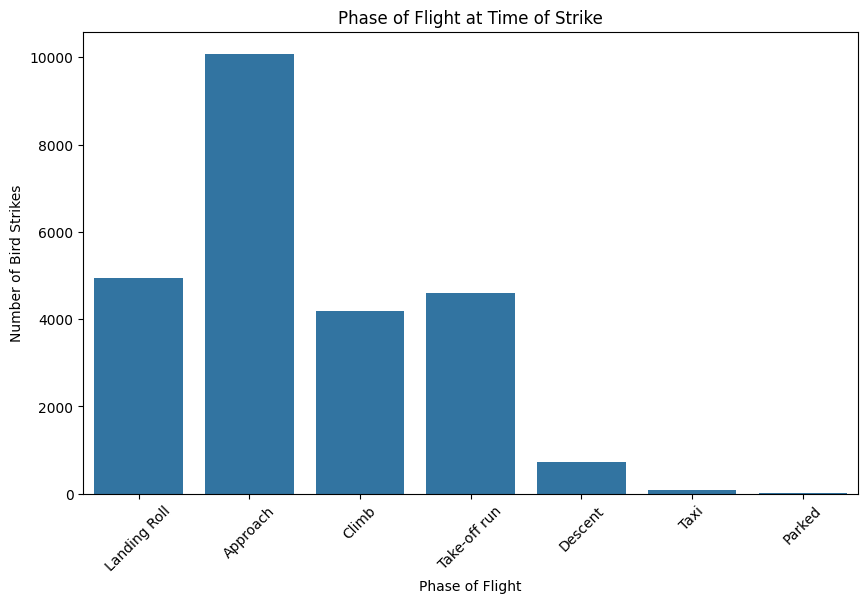

In [ ]:
# Phase of flight at the time of the strike
plt.figure(figsize=(10, 6))
sns.countplot(x=df['When: Phase of flight'])
plt.title('Phase of Flight at Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

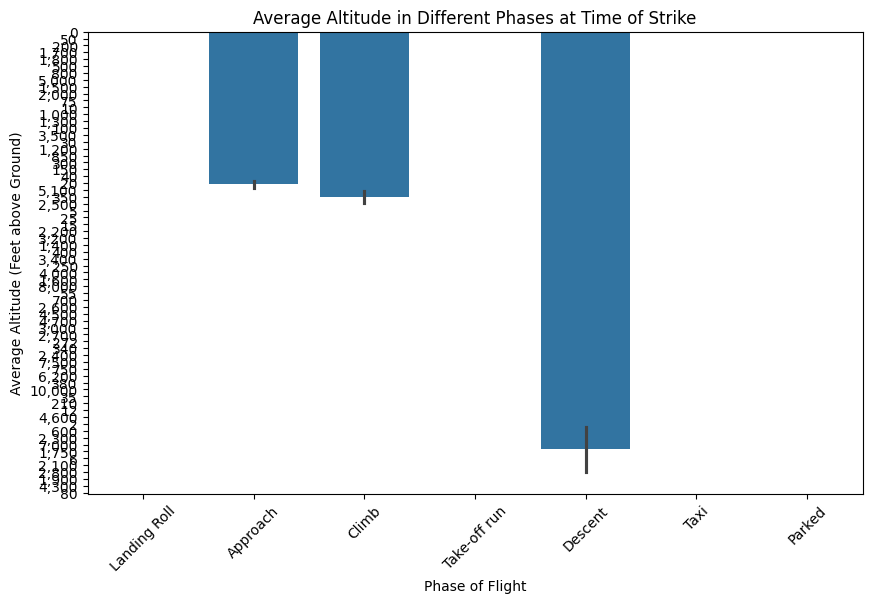

In [ ]:
# Average Altitude of the airplanes in different phases at the time of strike
plt.figure(figsize=(10, 6))
sns.barplot(x='When: Phase of flight', y='Feet above ground', data=df, estimator='mean')
plt.title('Average Altitude in Different Phases at Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.show()

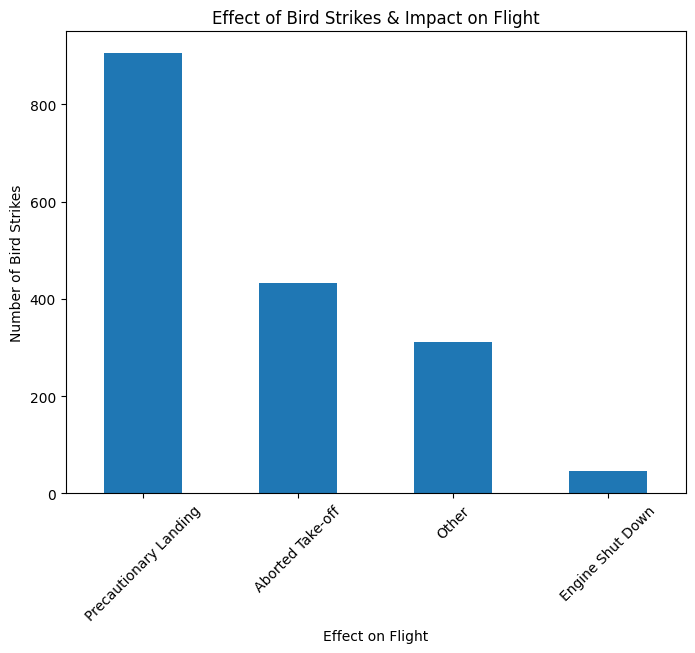

In [ ]:
# Effect of Bird Strikes & Impact on Flight
effect_counts = df['Effect: Impact to flight'].value_counts()
plt.figure(figsize=(8, 6))
effect_counts.plot(kind='bar')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Effect on Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

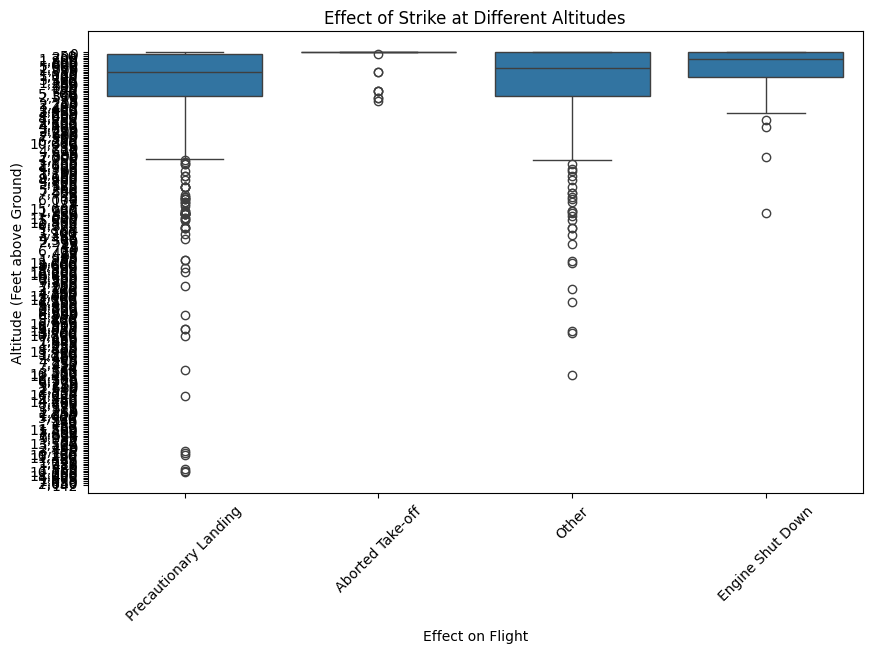

In [ ]:
# Effect of Strike at Different Altitude
plt.figure(figsize=(10, 6))
sns.boxplot(x='Effect: Impact to flight', y='Feet above ground', data=df)
plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Effect on Flight')
plt.ylabel('Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.show()

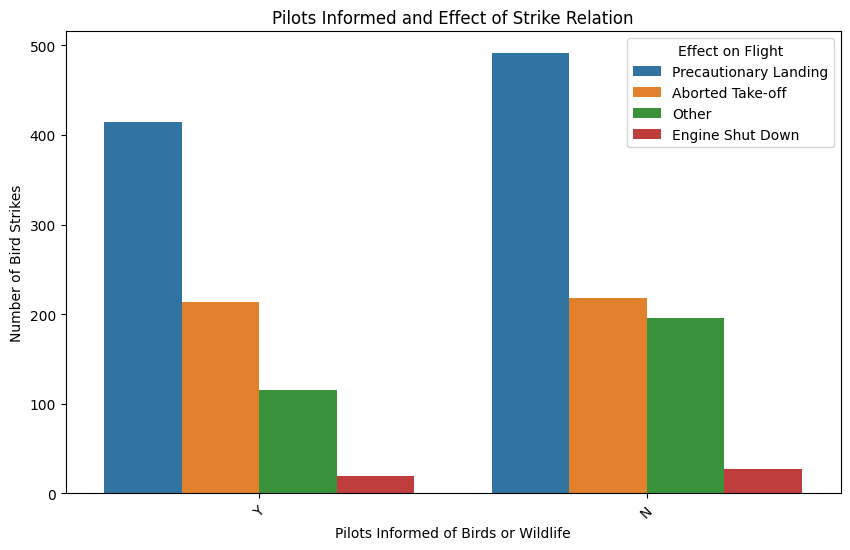

In [ ]:
# Were Pilots Informed? & Prior Warning and Effect of Strike Relation
plt.figure(figsize=(10, 6))
sns.countplot(x='Pilot warned of birds or wildlife?', hue='Effect: Impact to flight', data=df)
plt.title('Pilots Informed and Effect of Strike Relation')
plt.xlabel('Pilots Informed of Birds or Wildlife')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Effect on Flight')
plt.xticks(rotation=45)
plt.show()

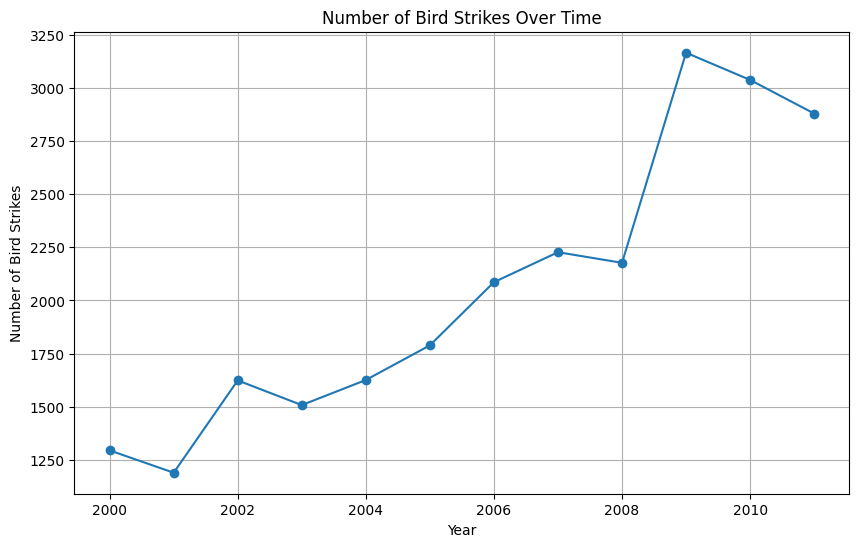

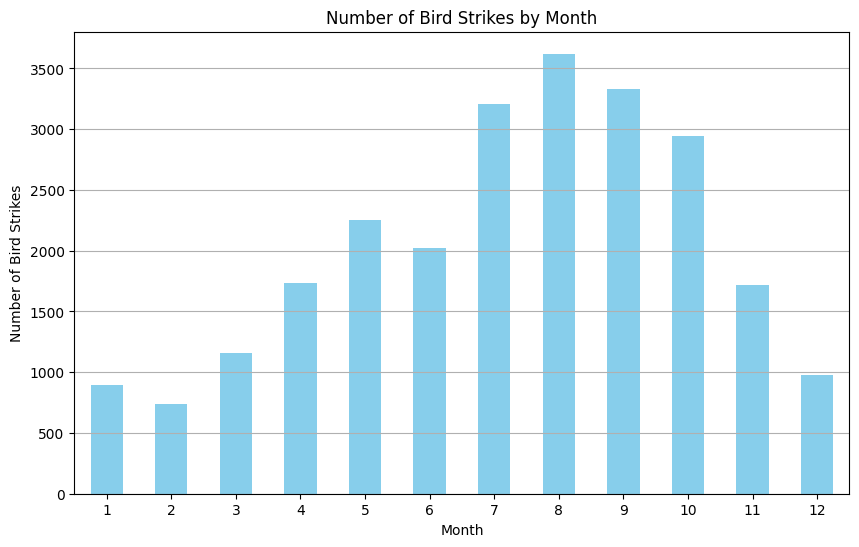

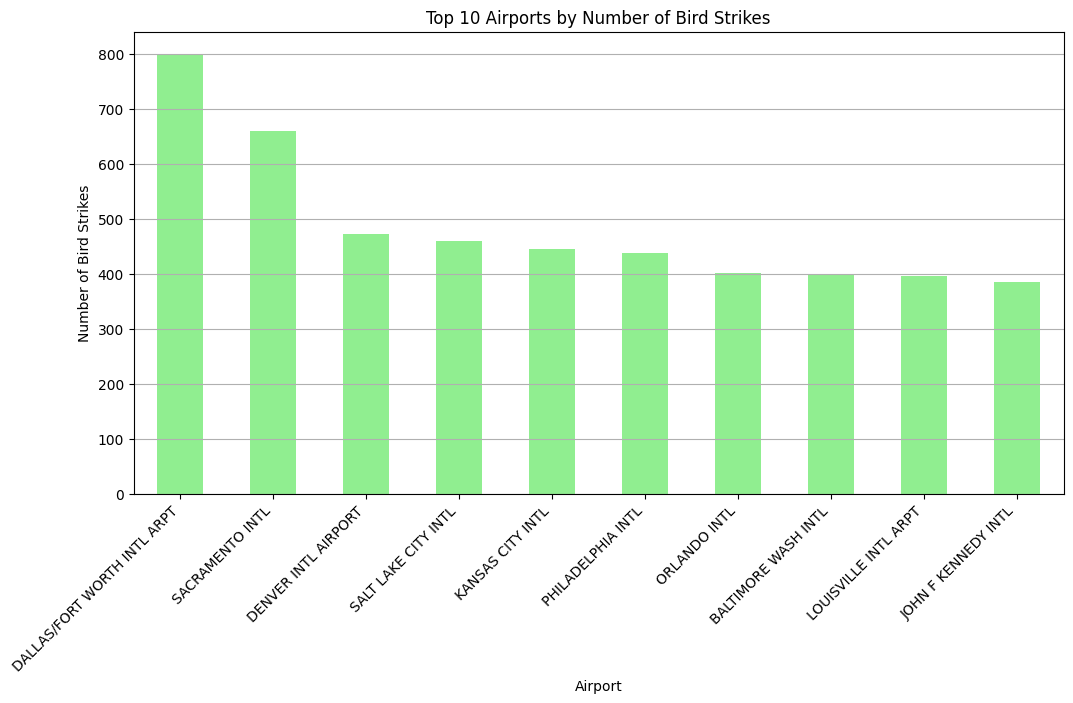

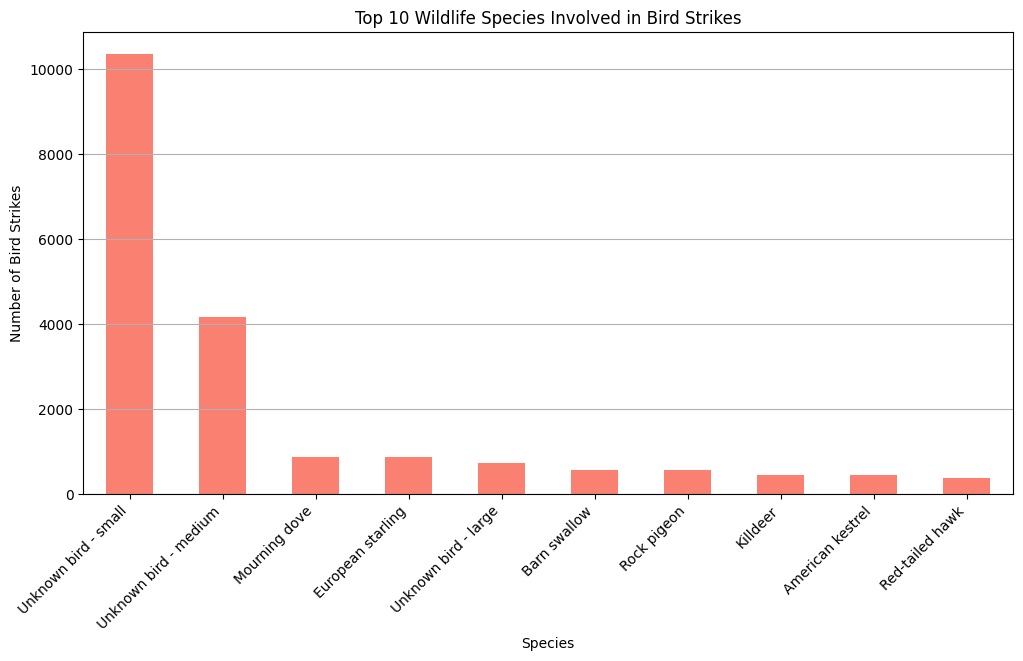

In [ ]:
# Create a new column for the year and month
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month

# 1. Line Plot of Bird Strikes Over Time
plt.figure(figsize=(10, 6))
df.groupby('Year').size().plot(kind='line', marker='o')
plt.title('Number of Bird Strikes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# 2. Bar Plot of Bird Strikes by Month
plt.figure(figsize=(10, 6))
df.groupby('Month').size().plot(kind='bar', color='skyblue')
plt.title('Number of Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 3. Bar Plot of Bird Strikes by Airport
top_airports = df['Airport: Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_airports.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 4. Bar Plot of Bird Strikes by Wildlife Species
top_species = df['Wildlife: Species'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_species.plot(kind='bar', color='salmon')
plt.title('Top 10 Wildlife Species Involved in Bird Strikes')
plt.xlabel('Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

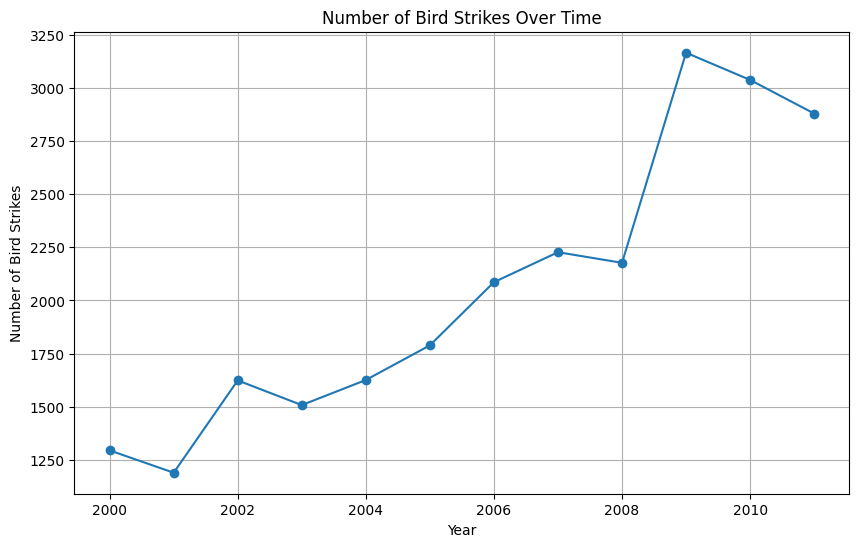

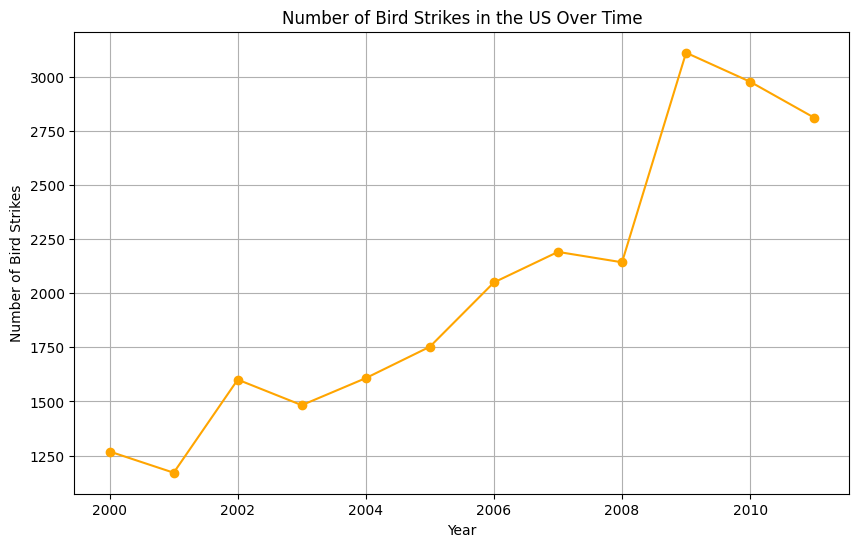

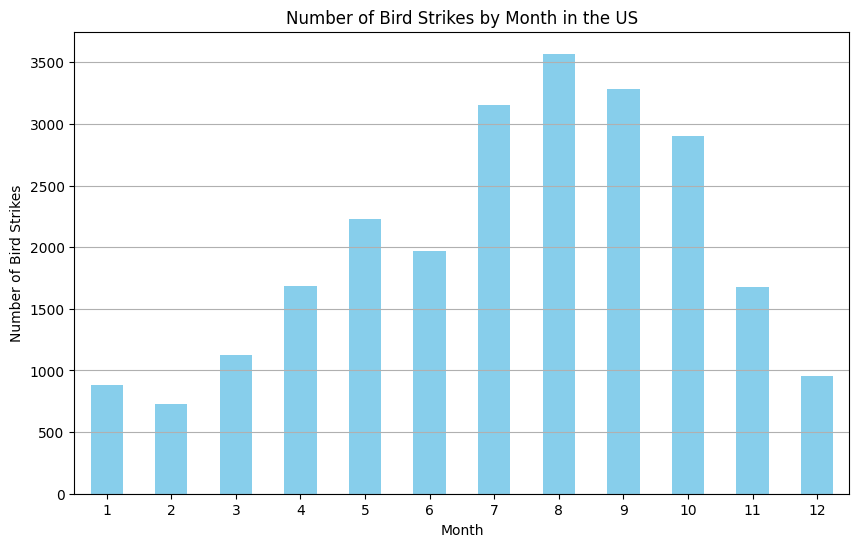

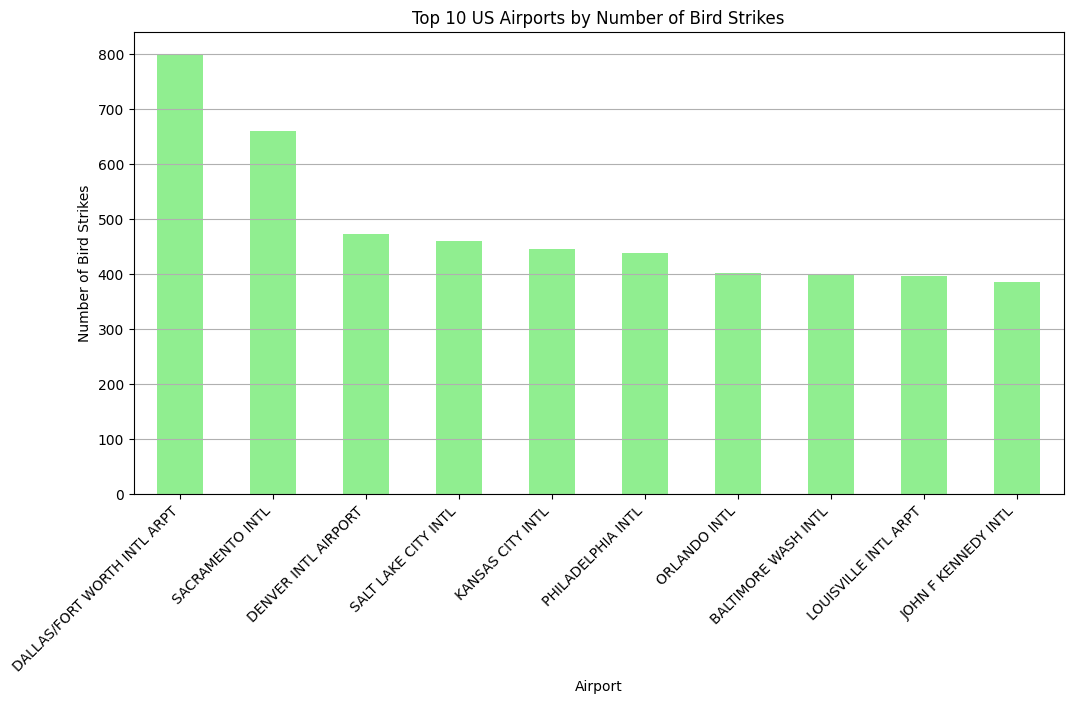

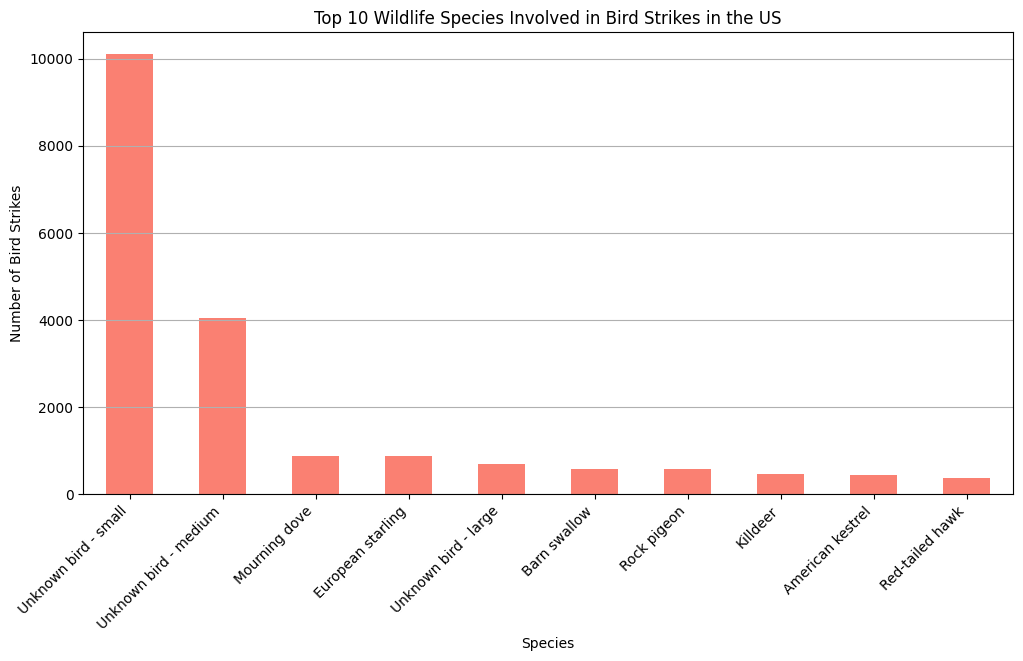

In [ ]:
# 1. Yearly Analysis of Bird Strikes
plt.figure(figsize=(10, 6))
df.groupby('Year').size().plot(kind='line', marker='o')
plt.title('Number of Bird Strikes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# 2. Bird Strikes in the US Over Time
us_data = df[df['Origin State'].notnull() & (df['Origin State'] != '')]  # Assuming 'Origin State' is the indicator for US
plt.figure(figsize=(10, 6))
us_data.groupby('Year').size().plot(kind='line', marker='o', color='orange')
plt.title('Number of Bird Strikes in the US Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# Additional visualizations

# Bar Plot of Bird Strikes by Month (US)
plt.figure(figsize=(10, 6))
us_data.groupby('Month').size().plot(kind='bar', color='skyblue')
plt.title('Number of Bird Strikes by Month in the US')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Bar Plot of Bird Strikes by Airport (US)
top_us_airports = us_data['Airport: Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_us_airports.plot(kind='bar', color='lightgreen')
plt.title('Top 10 US Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Bar Plot of Bird Strikes by Wildlife Species (US)
top_us_species = us_data['Wildlife: Species'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_us_species.plot(kind='bar', color='salmon')
plt.title('Top 10 Wildlife Species Involved in Bird Strikes in the US')
plt.xlabel('Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

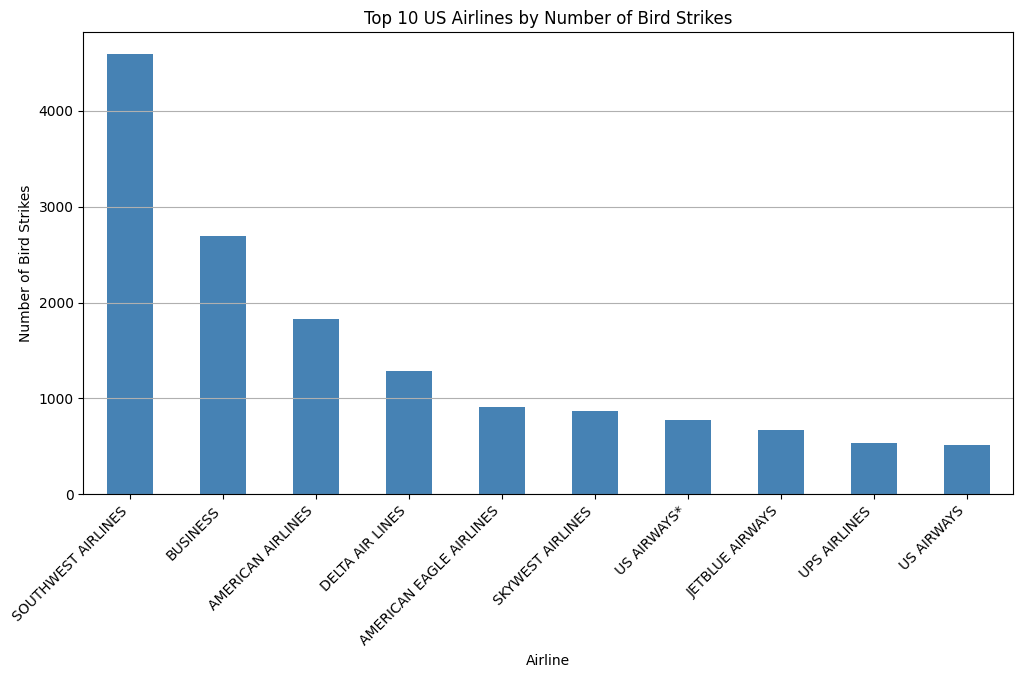

In [ ]:
# Filter data for US incidents
us_data = df[df['Origin State'].notnull() & (df['Origin State'] != '')]

# Count the number of bird strikes per airline
top_us_airlines = us_data['Aircraft: Airline/Operator'].value_counts().head(10)

# Plot the top 10 US airlines by number of bird strikes
plt.figure(figsize=(12, 6))
top_us_airlines.plot(kind='bar', color='steelblue')
plt.title('Top 10 US Airlines by Number of Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

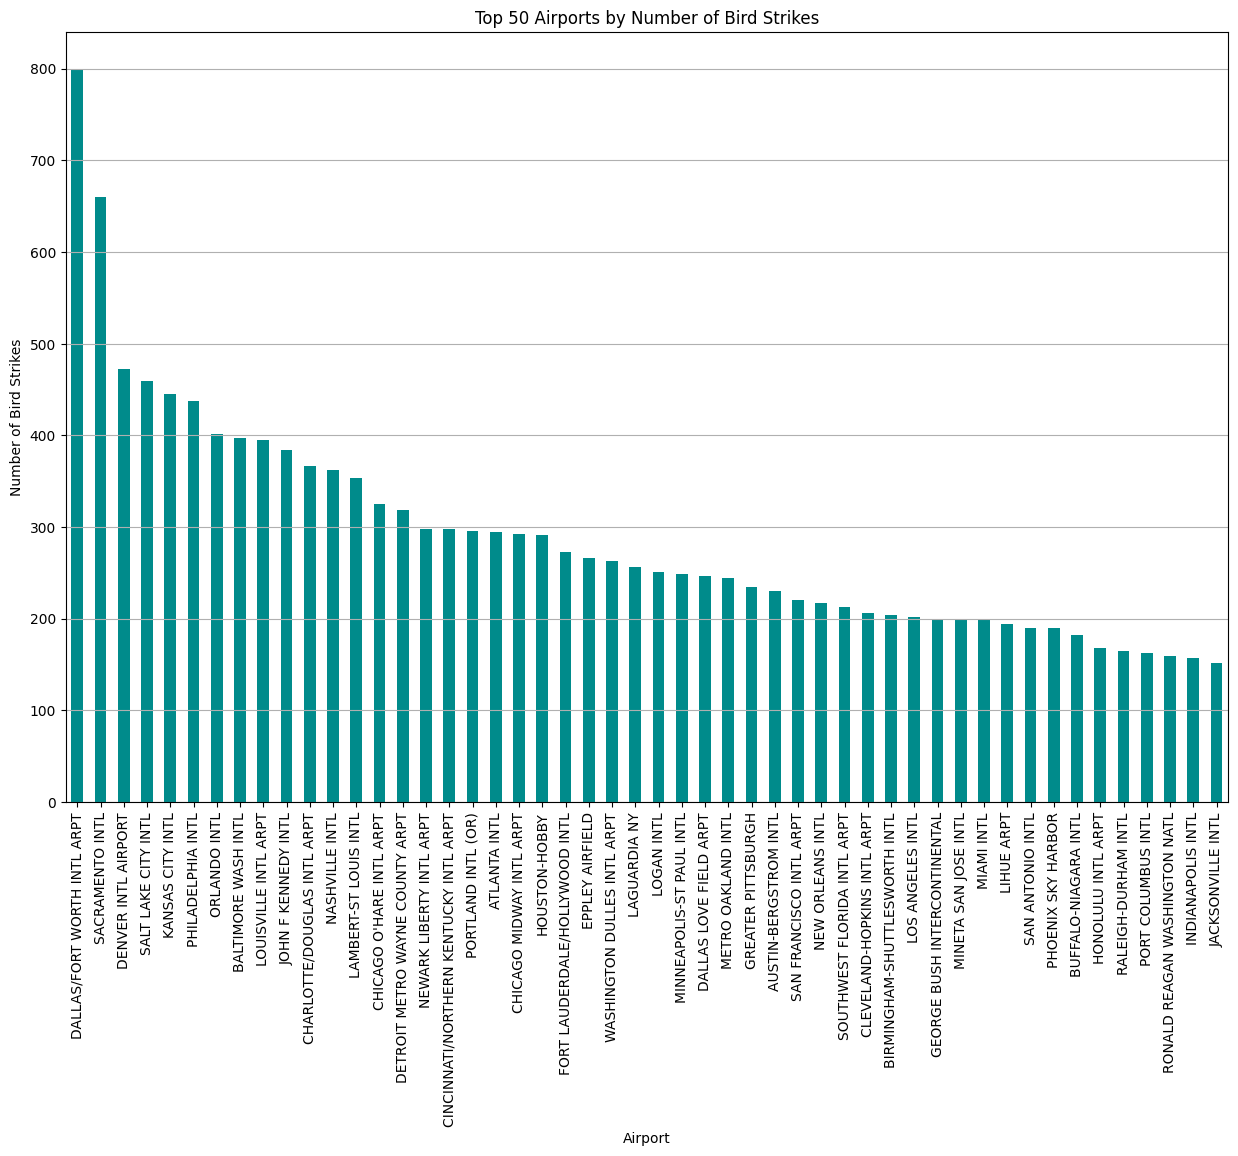

In [ ]:
# Count the number of bird strikes per airport
top_airports = df['Airport: Name'].value_counts().head(50)

# Plot the top 50 airports by number of bird strikes
plt.figure(figsize=(15, 10))
top_airports.plot(kind='bar', color='darkcyan')
plt.title('Top 50 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

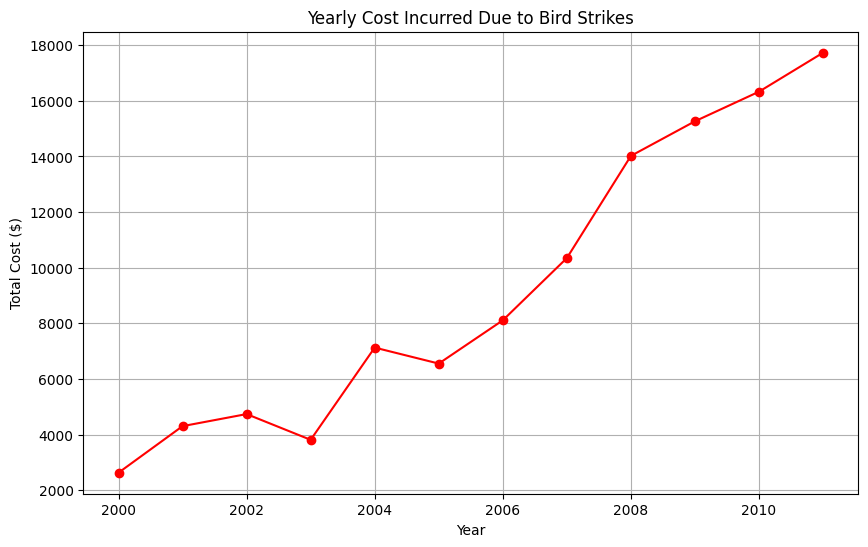

In [ ]:
# Extract the year from the 'FlightDate' column
df['Year'] = df['FlightDate'].dt.year

# Ensure the 'Cost: Total $' column is numeric, replacing non-numeric entries with NaN
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')

# Group by year and sum the costs
yearly_cost = df.groupby('Year')['Cost: Total $'].sum()

# Plot the yearly cost incurred due to bird strikes
plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='line', marker='o', color='red')
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()

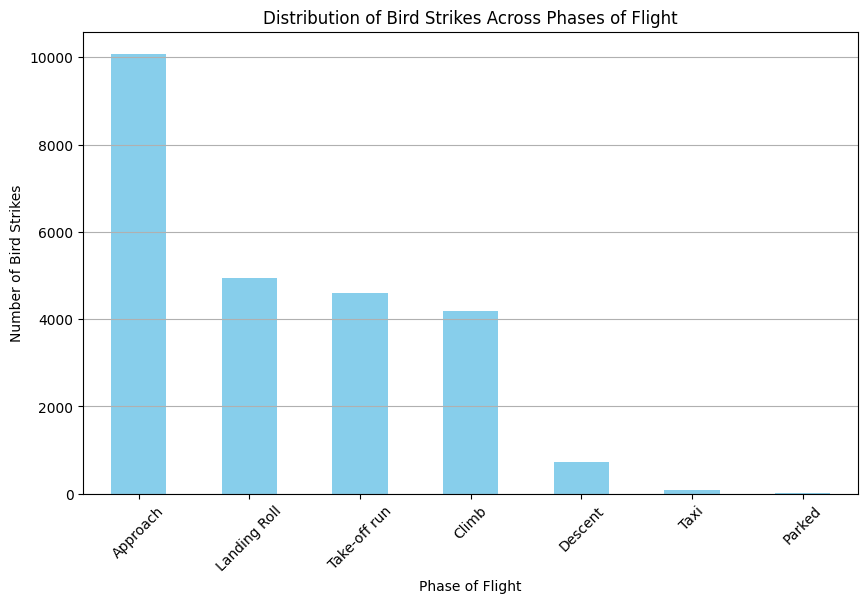

In [ ]:
# Count the number of bird strikes for each phase of flight
phase_counts = df['When: Phase of flight'].value_counts()

# Plot the distribution of bird strikes across different phases of flight
plt.figure(figsize=(10, 6))
phase_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bird Strikes Across Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

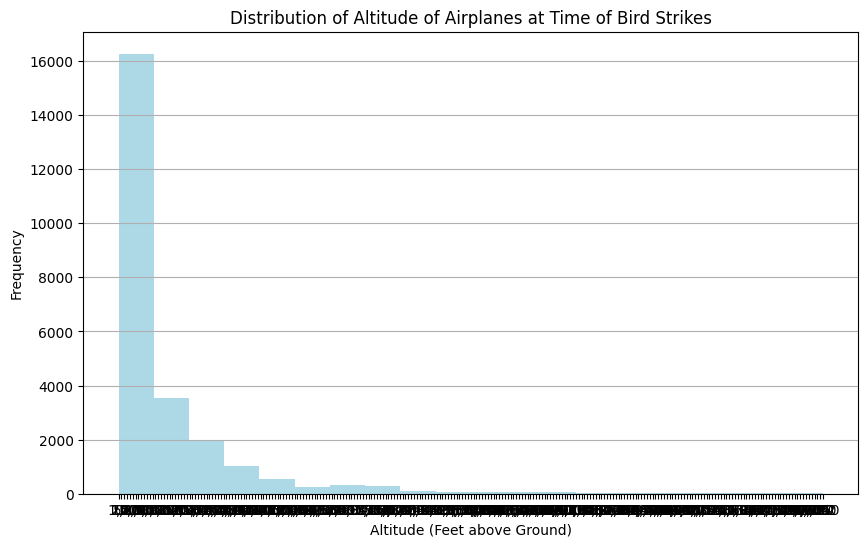

In [ ]:
# Filter out rows where altitude information is missing
data_with_altitude = df[df['Feet above ground'].notnull()]

# Plot a histogram of altitudes
plt.figure(figsize=(10, 6))
plt.hist(data_with_altitude['Feet above ground'], bins=20, color='lightblue')
plt.title('Distribution of Altitude of Airplanes at Time of Bird Strikes')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

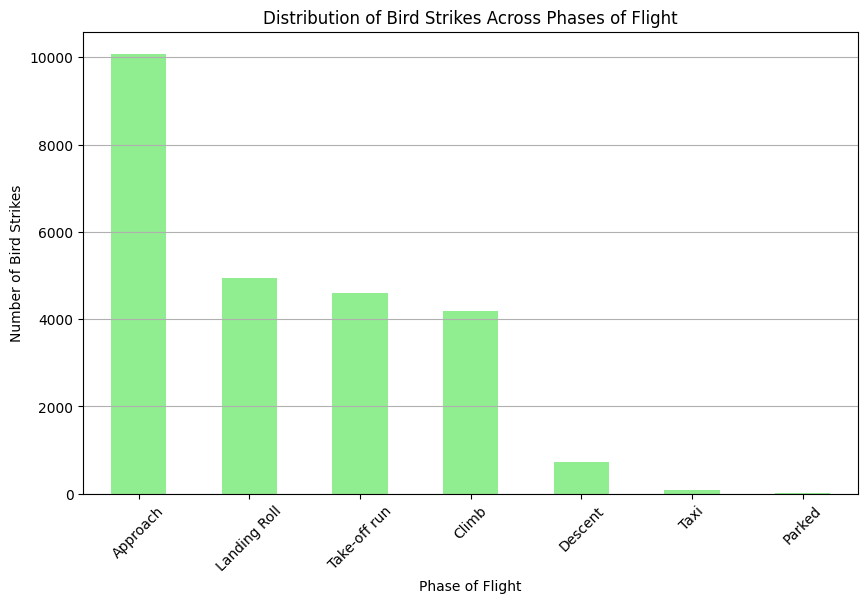

In [ ]:
# Count the number of bird strikes for each phase of flight
phase_counts = df['When: Phase of flight'].value_counts()

# Plot the distribution of bird strikes across different phases of flight
plt.figure(figsize=(10, 6))
phase_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Bird Strikes Across Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

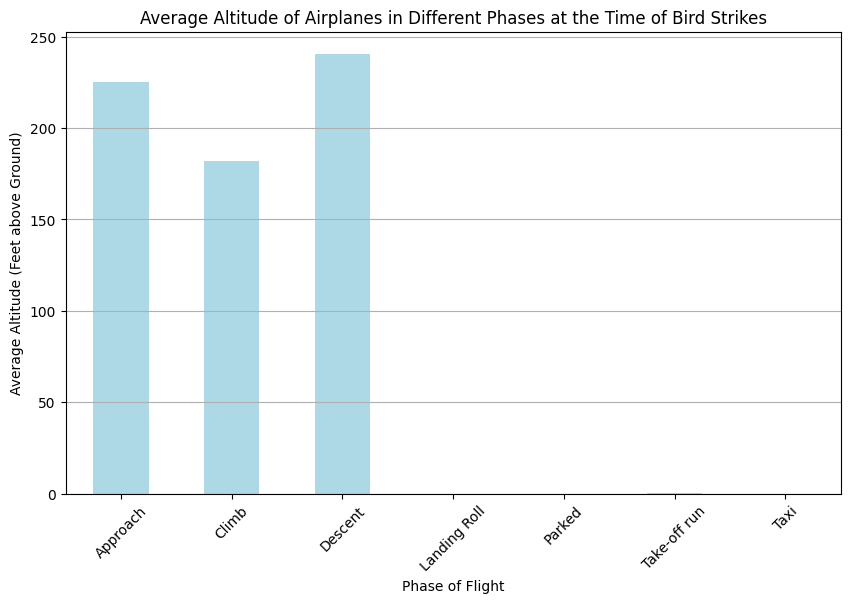

In [ ]:
# Filter out rows where altitude information is missing
data_with_altitude = df[df['Feet above ground'].notnull()]

# Convert 'Feet above ground' to numeric, handling errors
data_with_altitude['Feet above ground'] = pd.to_numeric(data_with_altitude['Feet above ground'], errors='coerce')

# Group the data by phase of flight and calculate the mean altitude for each phase
mean_altitude_by_phase = data_with_altitude.groupby('When: Phase of flight')['Feet above ground'].mean()

# Plot the average altitude for different phases of flight
plt.figure(figsize=(10, 6))
mean_altitude_by_phase.plot(kind='bar', color='lightblue')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strikes')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

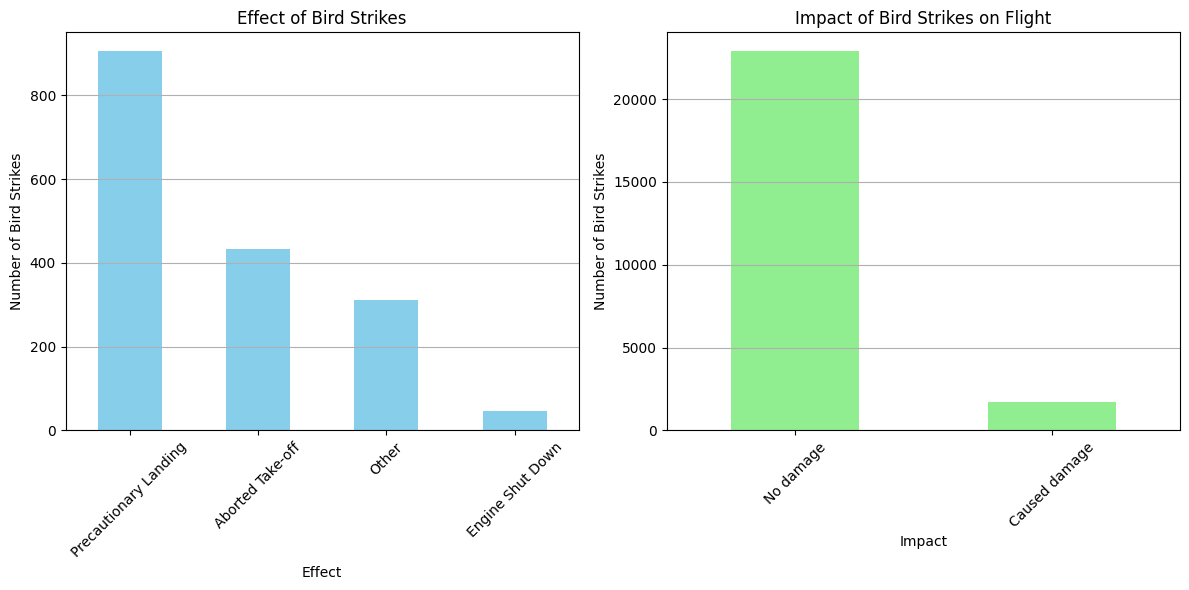

In [ ]:
# Count the number of occurrences for each effect of bird strikes
effect_counts = df['Effect: Impact to flight'].value_counts()

# Count the number of occurrences for each reported impact on flight
impact_counts = df['Effect: Indicated Damage'].value_counts()

# Plot the distribution of effects of bird strikes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
effect_counts.plot(kind='bar', color='skyblue')
plt.title('Effect of Bird Strikes')
plt.xlabel('Effect')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot the distribution of impacts on flight
plt.subplot(1, 2, 2)
impact_counts.plot(kind='bar', color='lightgreen')
plt.title('Impact of Bird Strikes on Flight')
plt.xlabel('Impact')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

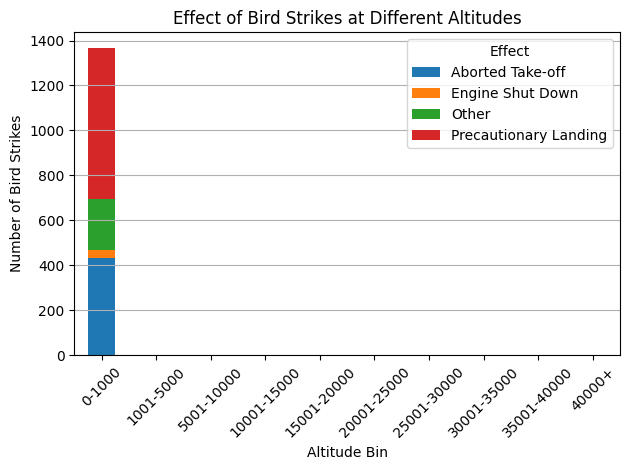

In [ ]:
# Filter out rows where altitude information is missing
data_with_altitude = df[df['Feet above ground'].notnull()]

# Convert 'Feet above ground' to numeric, handling errors
data_with_altitude['Feet above ground'] = pd.to_numeric(data_with_altitude['Feet above ground'], errors='coerce')

# Drop rows where conversion to numeric resulted in NaN
data_with_altitude = data_with_altitude.dropna(subset=['Feet above ground'])

# Define altitude bins
altitude_bins = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, float('inf')]
labels = ['0-1000', '1001-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40000+']

# Bin the altitude data
data_with_altitude['Altitude Bin'] = pd.cut(data_with_altitude['Feet above ground'], bins=altitude_bins, labels=labels, right=False)

# Count the number of occurrences for each effect of bird strikes in each altitude bin
effect_counts_by_altitude = data_with_altitude.groupby(['Altitude Bin', 'Effect: Impact to flight']).size().unstack(fill_value=0)

# Plot the distribution of effects of bird strikes at different altitudes
plt.figure(figsize=(12, 6))
effect_counts_by_altitude.plot(kind='bar', stacked=True)
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.legend(title='Effect')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

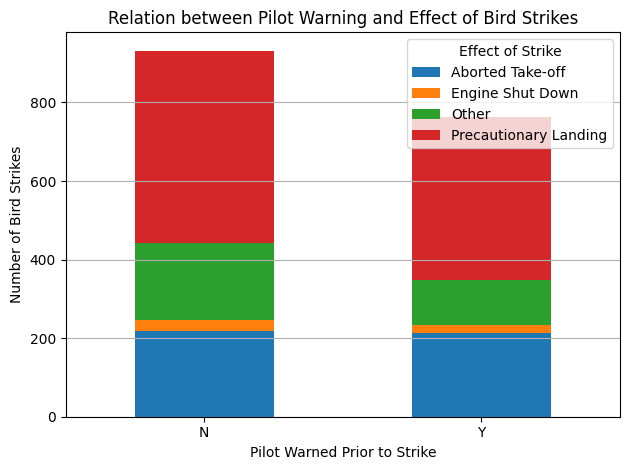

In [ ]:
# Filter out rows where information about pilot warning and effect of strike is missing
filtered_data = df[(df['Pilot warned of birds or wildlife?'].notnull()) & (df['Effect: Impact to flight'].notnull())]

# Count the number of occurrences for each combination of pilot warning and effect of strike
warning_effect_counts = filtered_data.groupby(['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']).size().unstack(fill_value=0)

# Plot the distribution of pilot warning and effect of strike
plt.figure(figsize=(10, 6))
warning_effect_counts.plot(kind='bar', stacked=True)
plt.title('Relation between Pilot Warning and Effect of Bird Strikes')
plt.xlabel('Pilot Warned Prior to Strike')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.legend(title='Effect of Strike')
plt.grid(axis='y')
plt.tight_layout()
plt.show()